# Problem 1

## Problem Description
In this problem you will create your own neural network to fit a function with two input features $x_0$ and $x_1$, and predict the output, $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an MSE for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model MSE
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

def dataGen():
    # Set random seed so generated random numbers are always the same
    gen = np.random.RandomState(0)
    # Generate x0 and x1
    x = 2*(gen.rand(200,2)-0.5)
    # Generate y with x0^2 - 0.2*x1^4 + x0*x1 + noise
    y = x[:,0]**2 - 0.2*x[:,1]**4 + x[:,0]*x[:,1] + 0.4*(gen.rand(len(x))-0.5)
    
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 25
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]),max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]),max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = model(Xgrid).reshape(n,n)
    # 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot data
    ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
    # Plot model
    ax.plot_surface(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(), color = 'gray', alpha = 0.25)
    ax.plot_wireframe(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(),color = 'black', alpha = 0.25)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 3D scatter plot.

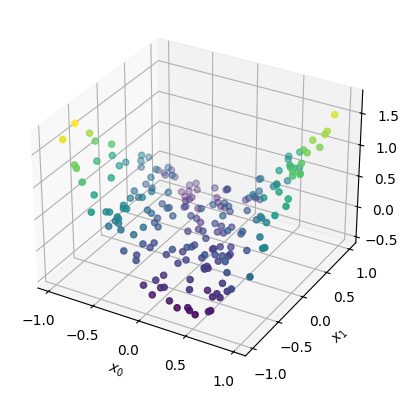

In [3]:
# YOUR CODE GOES HERE
x, y = dataGen()

fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$y$')
plt.show()

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An MSE smaller than 0.02 is reasonable. 

Epoch 0 of 500... 	Average loss: 0.21696589887142181
Epoch 50 of 500... 	Average loss: 0.0847841277718544
Epoch 100 of 500... 	Average loss: 0.019660526886582375
Epoch 150 of 500... 	Average loss: 0.015396270900964737
Epoch 200 of 500... 	Average loss: 0.0144802900031209
Epoch 250 of 500... 	Average loss: 0.0139854671433568
Epoch 300 of 500... 	Average loss: 0.013764220289885998
Epoch 350 of 500... 	Average loss: 0.013598893769085407
Epoch 400 of 500... 	Average loss: 0.013478774577379227
Epoch 450 of 500... 	Average loss: 0.013366257771849632


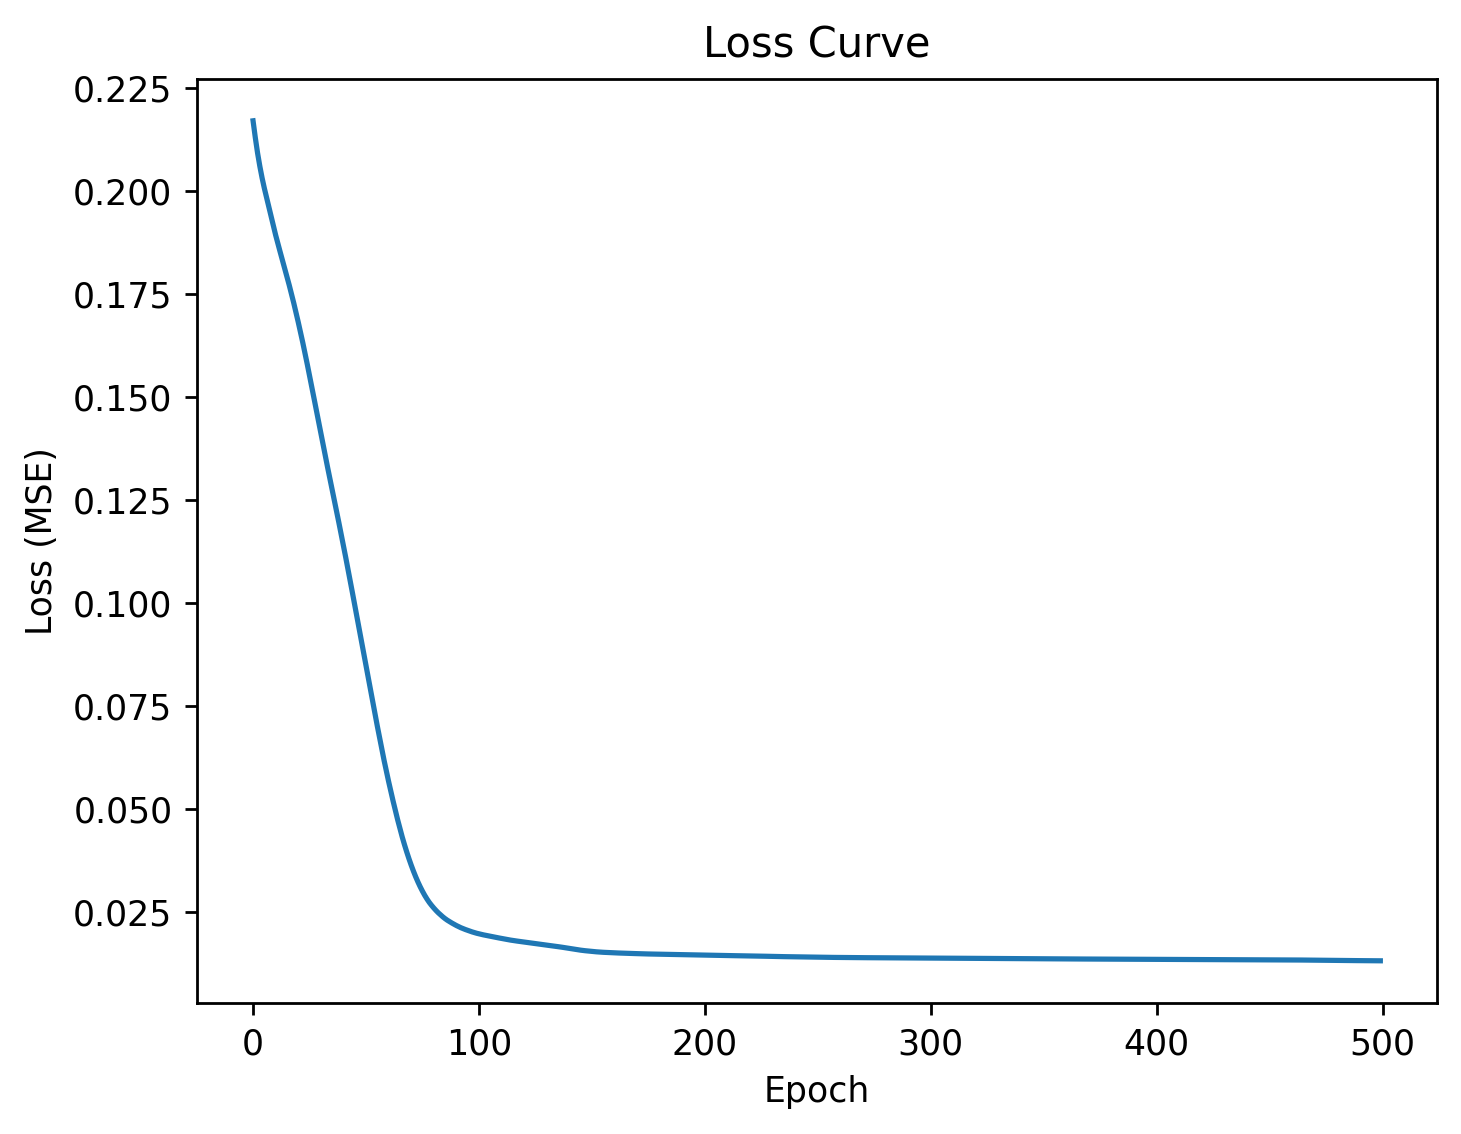

In [35]:
# YOUR CODE GOES HERE
from torch import optim
import torch.nn.functional as F

class NNet(nn.Module):
    def __init__(self, N_hidden=6, N_in=2, N_out=1, activation = F.relu):
        super().__init__()
        self.lin1 = nn.Linear(N_in, N_hidden)
        self.lin2 = nn.Linear(N_hidden, N_hidden)
        self.lin3 = nn.Linear(N_hidden, N_out)
        self.act = activation

    def forward(self,x):
        x = self.lin1(x)
        x = self.act(x)  # Activation of first hidden layer
        x = self.lin2(x)
        x = self.act(x)  # Activation at second hidden layer
        x = self.lin3(x) # (No activation at last layer)

        return x
    
x = torch.Tensor(x)
y = torch.Tensor(y.reshape(-1,1))
    
model = NNet(N_hidden = 6)
loss_curve = []

lr = 0.005
epochs = 500
loss_fcn = nn.MSELoss()

opt = optim.Adam(params = model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    out = model(x) # Evaluate the model
    loss = loss_fcn(out,y)

    loss_curve.append(loss.item())

    # Print loss progress info 50 times during training
    if epoch % int(epochs / 10) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()}")

    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

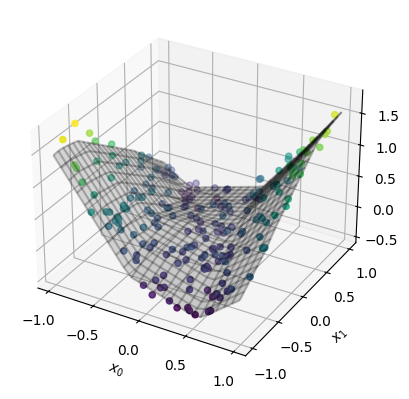

In [23]:
# YOUR CODE GOES HERE
visualizeModel(model)

## Discussion
Report the MSE of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

*YOUR ANSWER GOES HERE*
- Final MSE: 0.013366257771849632
- I use 2 hidden layers and 6 neurons same as the practice example, to try the results, it turns out to be reasonable for the results.
- I choose ReLU as my activation function since it is fast to compute.
- I choose MSE as my loss function to compare to the requirement under 0.02.
- I choose learning rate as 0.005 to increase slowly and total 500 epochs to train. I notice the model starts to converge after 100 epochs so 500 is enough.